## Final Project Submission
* Student name: **Frank Kiptoo Ruto**
* Student pace: **Part Time**
* Instructor name: **Stella Waithera**

## Project Overview

The objective of this project is to develop a binary classifier aimed at predicting the likelihood of customer churn for SyriaTel, a telecommunications company. The primary audience for this classifier is the telecom business itself, with a keen interest in minimizing financial losses associated with customers who are prone to discontinue their services. By leveraging machine learning algorithms, we aim to uncover predictable patterns in customer behavior that can empower SyriaTel to proactively address potential churn, optimize customer retention strategies, and enhance overall customer satisfaction. Through the analysis of relevant features and the creation of a robust predictive model, the goal is to provide actionable insights that contribute to the company's efforts in mitigating churn and maximizing long-term customer value.

## Business Problem

SyriaTel, a leading telecommunications company, faces a critical challenge in customer retention. The increasing rate of customer churn poses a significant financial impact, leading to revenue losses and hindering the company's long-term growth prospects. To address this issue, SyriaTel seeks to develop an effective predictive model that can identify customers at risk of discontinuing their services in the near future. By understanding and leveraging patterns in customer behavior, the goal is to implement targeted retention strategies, reduce churn rates, and ultimately enhance the overall customer experience. 

The business problem revolves around the need for a reliable binary classifier that enables SyriaTel to proactively address customer churn, optimize resource allocation, and foster a sustainable and loyal customer base.

## Data Source

The project makes use of data sourced from Kaggle, accessible [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). This dataset encompasses different variables such as state, account length, area code, phone number, international plan, voice mail plan, number of voicemail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls, and churn.

## Methodology

The project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which includes multiple phases: understanding data, preparing data, modeling, evaluating, and deployment. In the modeling stage, various predictive models will be developed and examined. The process will begin with a basic logistic regression model and advance to more complex models such as Decision Trees. Evaluation of performance will involve metrics such as accuracy, precision, recall, and F1-score.

## Objectives

* Develop machine learning models for predicting customer churn by analyzing customer features with data.
* Compare the machine learning models and identify the most suitable model in prediction.
* Identify the particular features influencing the customer churn rate at SyriaTel, offer valuable recommendations derived from the discoveries, thereby aiding in reducing churn rates and enhancing customer retention for the company.

## Data Understanding

This helps in understanding the data before further analysis and modelling.

### Importation of Libraries

In [101]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

### Loading the Data into a Dataframe

In [4]:
# Reading csv file and loading into a df
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")

In [6]:
# Previewing the first 10 records
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6           

In [7]:
# check no. of rows and columns
df.shape

(3333, 21)

The dataframe consists of 3333 rows and 21 columns

In [8]:
# check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
# Preview the overview of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset consists of 3333 entries and 21 columns. Each entry represents a customer, and the columns provide various features related to their telecommunications usage and account information. Here's a brief overview of the columns:

* state: The state in which the customer resides.
* account length: The duration of the customer's account in days.
* area code: The area code associated with the customer's phone number.
* phone number: The customer's phone number.
* international plan: Whether the customer has an international plan (binary: yes/no).
* voice mail plan: Whether the customer has a voicemail plan (binary: yes/no).
* number vmail messages: The number of voicemail messages.
* total day minutes: Total minutes of day calls.
* total day calls: Total number of day calls.
* total day charge: Total charge for day calls.
* total eve minutes: Total minutes of evening calls.
* total eve calls: Total number of evening calls.
* total eve charge: Total charge for evening calls.
* total night minutes: Total minutes of night calls.
* total night calls: Total number of night calls.
* total night charge: Total charge for night calls.
* total intl minutes: Total minutes of international calls.
* total intl calls: Total number of international calls.
* total intl charge: Total charge for international calls.
* customer service calls: Number of customer service calls made by the customer.
* churn: Whether the customer has churned (i.e., stopped doing business with the company, binary: True/False).

In [11]:
# Check for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

It appears that there are no missing values in the columns

## Exploratory Data Analysis

In [12]:
# Description of the df
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

From the above description, the columns that do not appear to directly influence churn (the target variable) based on the provided description are:

* state: The state in which the customer resides.
* account length: The duration of the customer's account in days.
* area code: The area code associated with the customer's phone number.
* phone number: The customer's phone number.

These columns seem to provide information that is less likely to be directly related to the decision of a customer to churn or not

In [14]:
# Drop columns that do not affect the churn
columns_to_drop = ['state', 'account length', 'area code', 'phone number']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

Our target variable, churn consists of boolean values. Changing them to 0's and 1's makes it easy to use these variables in our various models, and simplifies data handling and interpretation.

In [18]:
# Convert churn values to 0's and 1's
df['churn'] = df['churn'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [19]:
# Check value counts
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

0 and 1 are the unique values in the 'churn' column indicating False and True respectively.
* 2850 is the count of occurrences of the value 0 (indicating no churn).
* 483 is the count of occurrences of the value 1 (indicating churn).

In [20]:
# Check value counts of international plan
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [22]:
# Check value counts of voice mail plan
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [23]:
# Convert international plan and voice mail plan columns to 0's and 1's
# Iterate through object columns with binary values
for column in ['international plan', 'voice mail plan']:
    df[column] = df[column].map({'no': 0, 'yes': 1})

In [25]:
# Check info of df after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   int64  
 1   voice mail plan         3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

## Data Exploration

In [26]:
# Categorical columns
cat_columns = ['international plan', 'voice mail plan', 'churn']

# Continuous columns
cont_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls',
                'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls',
                'total intl charge', 'customer service calls']

## Feature Analysis and Visualization

### Categorical Feature Analysis

The churn column will be used as the target variable for our analysis.
It indicated whether the customer has churned (i.e., stopped doing business with the company, binary: True/False)

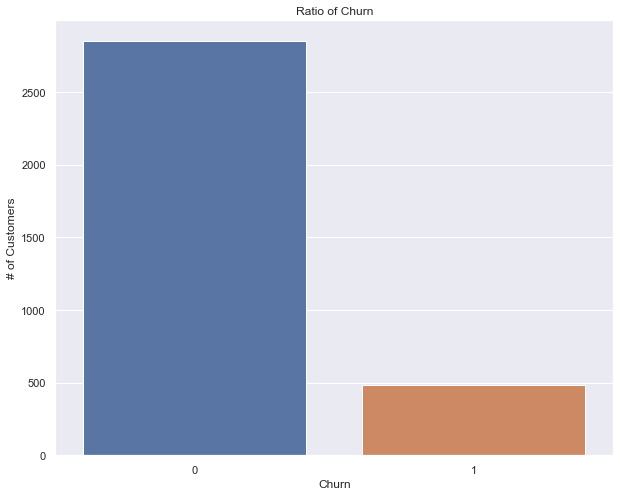

In [39]:
# Seaborn plot of churn values
plt.figure(figsize=(10, 8))  
sns.countplot(x='churn', data=df)
sns.set(style="darkgrid")
plt.title('Ratio of Churn')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.show()

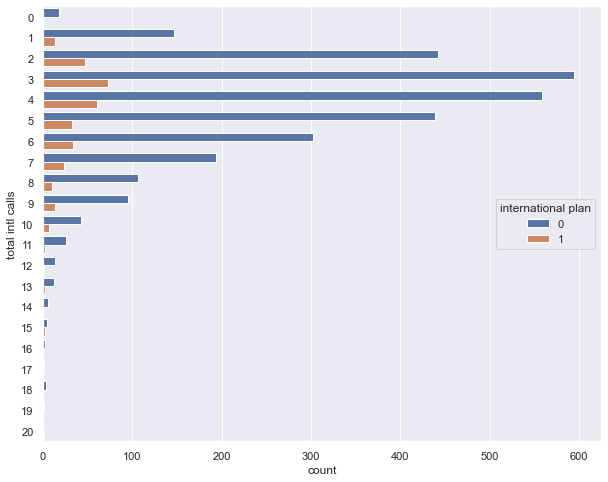

In [63]:
# Countplot of International Plan calls
plt.figure(figsize=(10, 8))
sns.countplot(y='total intl calls', hue='international plan', data=df);

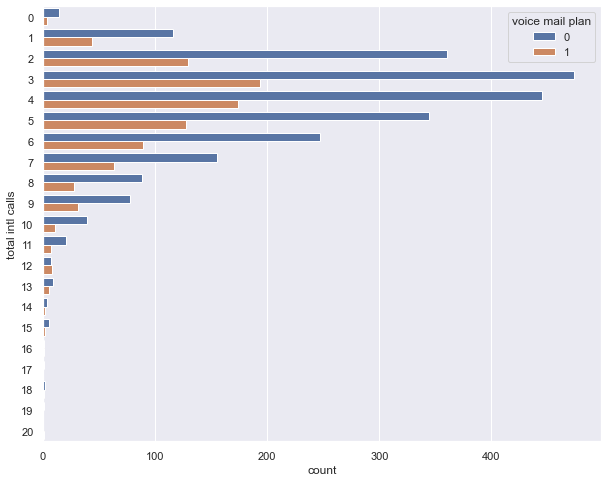

In [79]:
# Countplot of Voice Mail Plan calls
plt.figure(figsize=(10, 8))
sns.countplot(y='total intl calls', hue='voice mail plan', data=df);

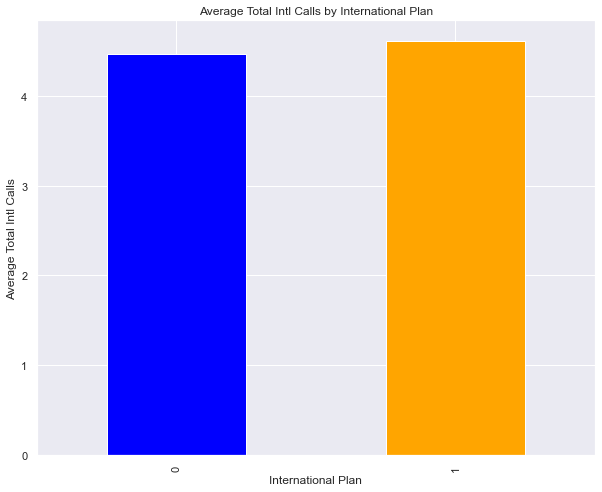

In [80]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = df.groupby('international plan')['total intl calls'].mean()

# Increase the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bar plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()

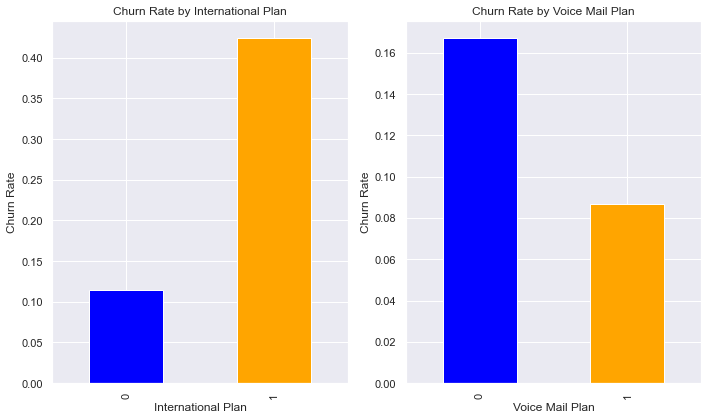

In [82]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first subplot: International Plan
df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Numerical Feature Analysis

Given that the columns in our numerical columns list are about 13, we will plot the histplot visualization of about 5 columns to give an overview of the numerical columns

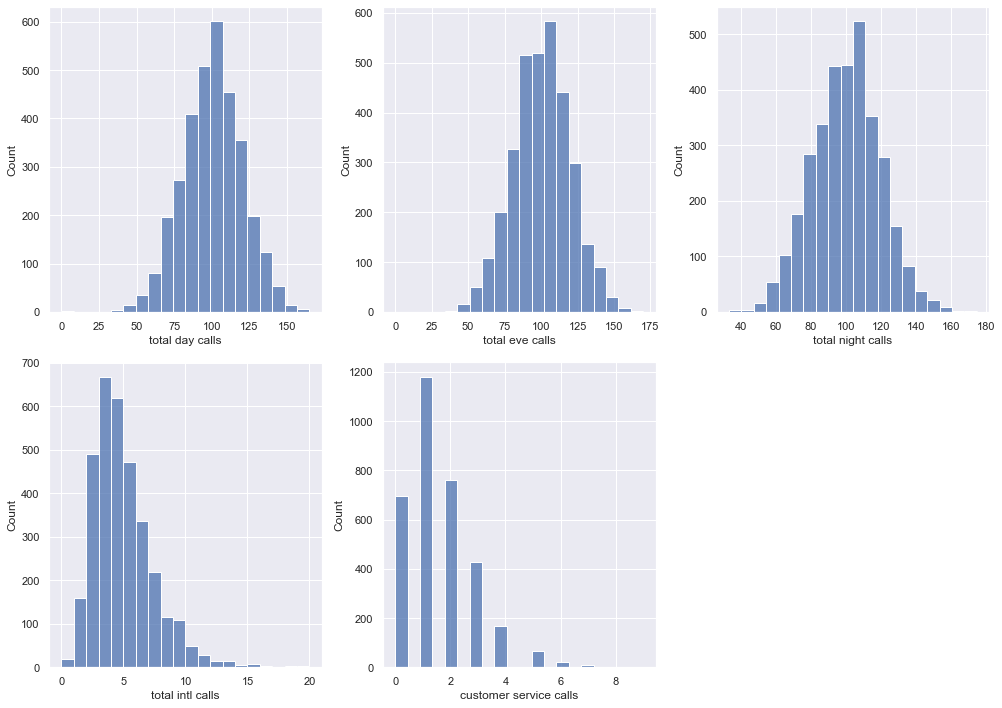

In [51]:
# Create a 2x3 grid of subplots with a specified figure size
f, ax = plt.subplots(2, 3, figsize=(14, 10))

# Plot histograms for the specified columns in different subplots
sns.histplot(df["total day calls"], bins=20, ax=ax[0, 0])
sns.histplot(df["total eve calls"], bins=20, ax=ax[0, 1])
sns.histplot(df["total night calls"], bins=20, ax=ax[0, 2])
sns.histplot(df["total intl calls"], bins=20, ax=ax[1, 0])
sns.histplot(df["customer service calls"], bins=20, ax=ax[1, 1])

# Remove the extra subplot in the last row and last column
f.delaxes(ax[1, 2])

# Adjust the spacing between the subplots for better layout
plt.tight_layout()

# Display the plot
plt.show()

From the above plot, it can be observed that all the columns besides customer service calls have a normal distribution.

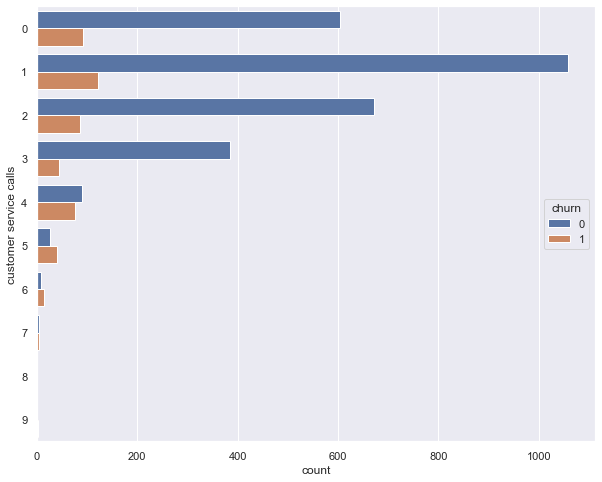

In [59]:
# Countplot of customer service calls
plt.figure(figsize=(10, 8))  
sns.countplot(y='customer service calls', hue='churn', data=df);

## Outliers

In [83]:
# Function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [85]:
# checking for outliers in our continuos columns
detect_outliers(df[cont_columns]).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [86]:
# Function to remove outliers
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [87]:
# Removing outliers from Continous columns
filtered_data = remove_outliers(df[cont_columns])

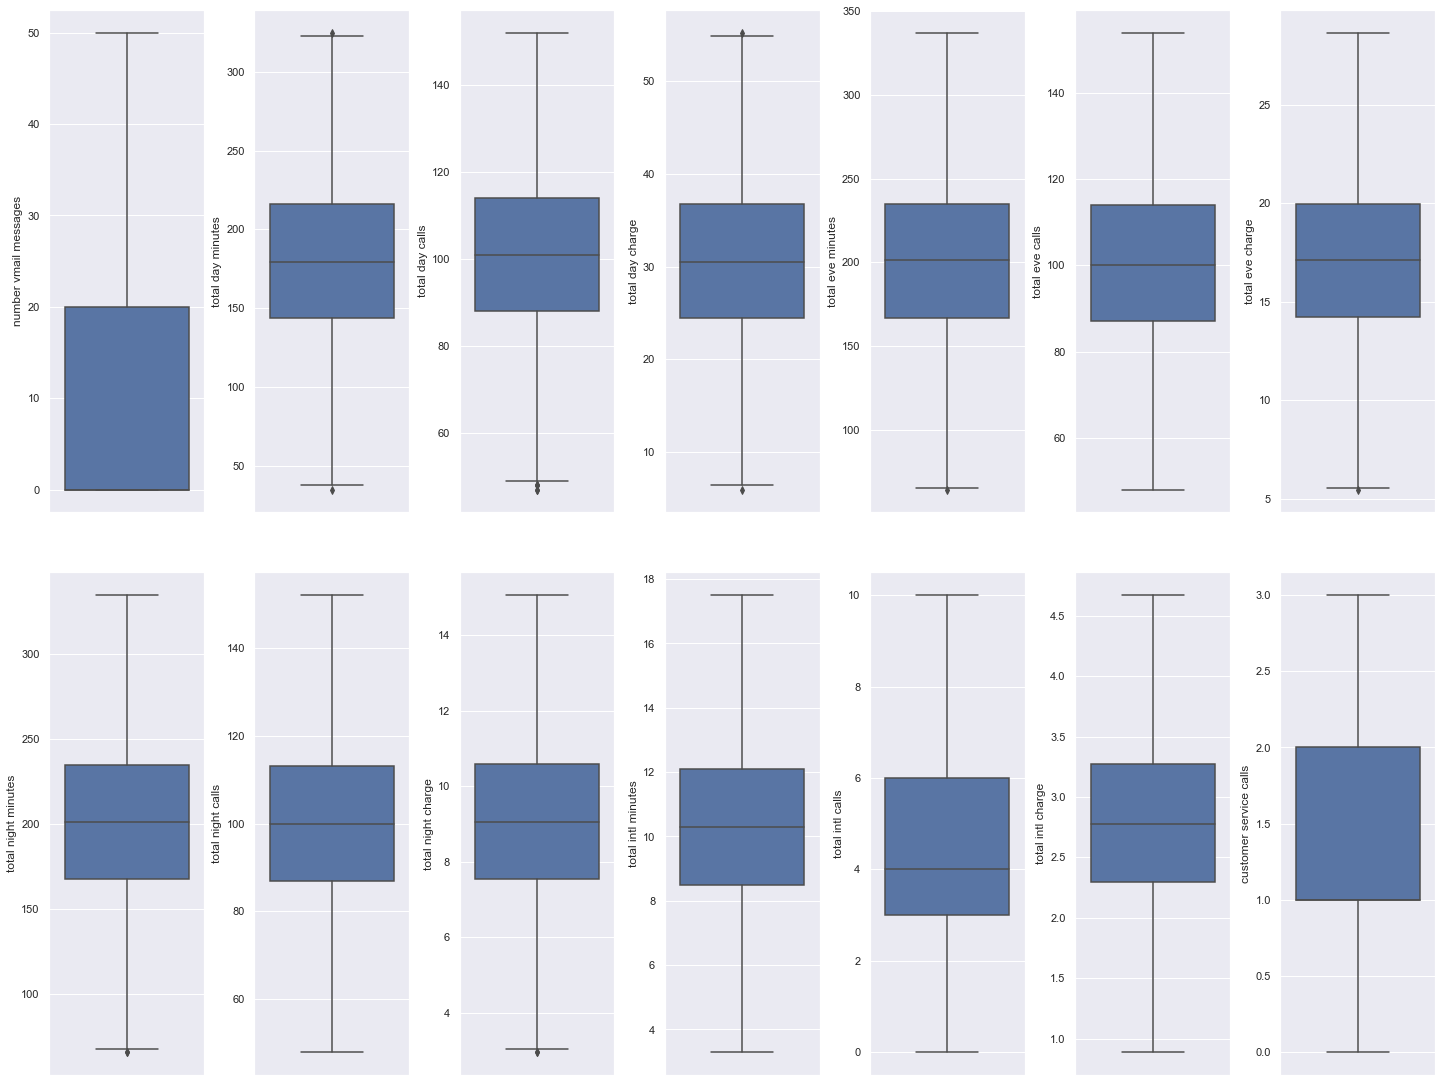

In [89]:
# Box plot to check for outliers
# visualizing with matplotlib and seaborn 
sns.set_style('darkgrid')
fig,ax = plt.subplots(ncols=7,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

## Correlation Heatmap of the Numerical features

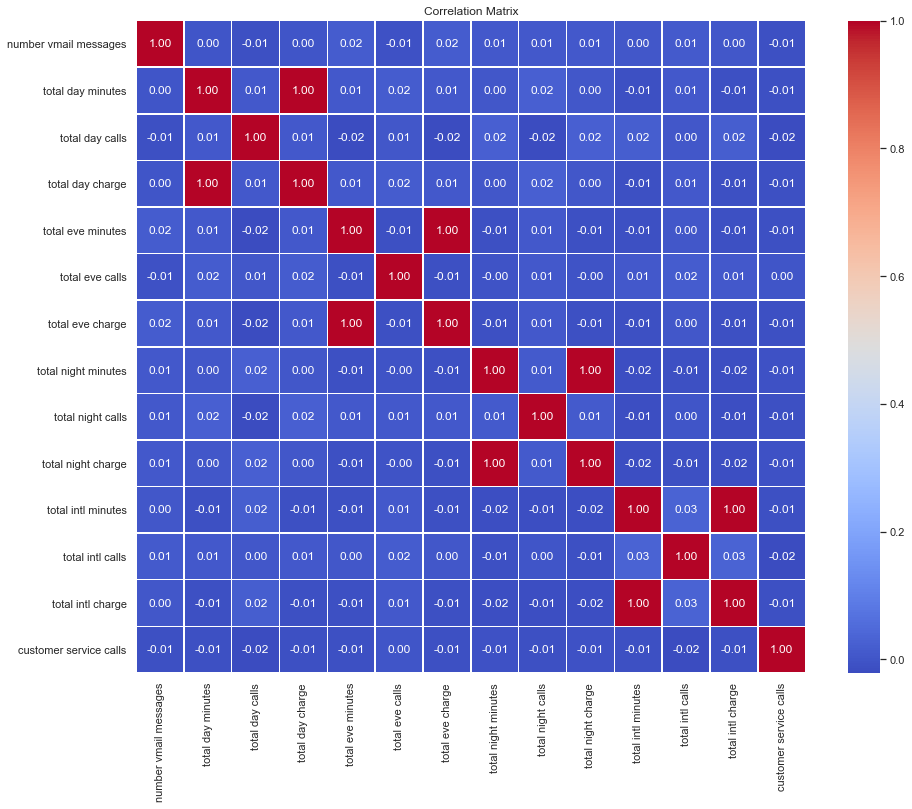

In [92]:
# Correlation Heatmap Plot
correlation_matrix = df[cont_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [93]:
# Calculate the correlation matrix for all columns in the DataFrame
corr_matrix = df.corr()

# Sort and display the correlation values of each feature with respect to the 'churn' column
# in descending order (highest correlation first)
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

The correlation output shows the correlation coefficients between the 'churn' column (target variable) and other features in the DataFrame.

**Positive Correlations:**

'international plan': 0.259852

'customer service calls': 0.208750

'total day minutes': 0.205151

'total day charge': 0.205151

'total eve minutes': 0.092796

'total eve charge': 0.092786

'total intl charge': 0.068259

'total intl minutes': 0.068239

'total night charge': 0.035496

'total night minutes': 0.035493

'total day calls': 0.018459

**Weak Positive Correlations:**

'total eve calls': 0.009233

'total night calls': 0.006141

**Negative Correlations:**

'total intl calls': -0.052844

'number vmail messages': -0.089728

'voice mail plan': -0.102148

Positive correlations suggest that higher values in these features are associated with a higher likelihood of churn.

Negative correlations suggest that higher values in these features are associated with a lower likelihood of churn.

## Encoding Categorical Columns using OHE

In [97]:
# Transformimg categorical columns using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded

number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      customer service calls  churn  international plan_1  voice mail plan_1  
0                          1      0                   0.0                1.0  
1                          1      0                   0.0                1.0  
2                          0      0                   0.0                0.0  
3                          2      0                   1.0                0.0  
4                          3      0                   1.0                0.0  
...                      ...    ...                   ...                ...  
3328                       2      0                   0.0                1.0  
3329      

## Modeling

### Train/Test Split

The train/test split is crucial for assessing our model's ability to generalize to new, unseen data and avoiding overfitting. It helps in making informed decisions about the model's performance and guides further improvements or adjustments.

For this dataset, we will use a train size of 80% and a test size of 20%.

In [98]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns='churn', axis=1)
y = df_encoded['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

### Standardization

This will transform our data in a way that the features have a mean of 0 and a standard deviation of 1.

It will bring the features onto a common scale and make the modeling process more robust, and the resulting models are less likely to be biased by the scale of the input features.

In [99]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Class Imbalance using SMOTE

We are going to use SMOTE to solve for class imbalance to address the class imbalance by generating synthetic examples for the minority class.

In [102]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [103]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2284
0    2284
Name: churn, dtype: int64
